# Model fitting

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
import jetset
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs


In [2]:
test_SEDs

['/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_3C345.ecsv',
 '/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421.ecsv',
 '/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk501.ecsv']

## loading data



In [3]:
data=Data.from_file(test_SEDs[2])



***  binning data  ***
---> N bins= 90
---> bin_widht= 0.2



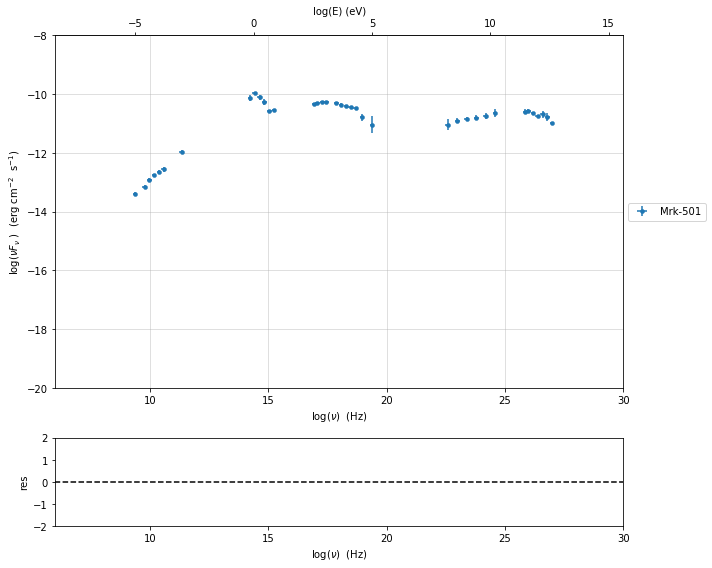

In [4]:
%matplotlib inline
sed_data=ObsData(data_table=data)
sed_data.group_data(bin_width=0.2)

sed_data.add_systematics(0.1,[10.**6,10.**29])
p=sed_data.plot_sed()

## phenomenological model constraining

### spectral indices


*** evaluating spectral indices for data ***
---> initial range for index radio  set to [6.000000,10.000000]
---> range for index radio updated  to [6.000000,10.000000]
---> name = radio            range=[6.000 ,10.000] log(Hz)  photon.val=-1.295207e+00, err=1.359752e-01 

---> initial range for index radio_mm  set to [10.000000,11.000000]
---> range for index radio_mm updated  to [10.000000,11.000000]
---> name = radio_mm         range=[10.000,11.000] log(Hz)  photon.val=-1.455018e+00, err=5.280897e-02 

---> initial range for index mm_IR  set to [11.000000,13.000000]
---> range for index mm_IR updated  to [10.300000,13.700000]
---> name = mm_IR            range=[10.300,13.700] log(Hz)  photon.val=-1.296277e+00, err=3.749588e-02 

---> initial range for index IR_Opt  set to [13.000000,14.000000]
---> range for index IR_Opt updated  to [12.300000,14.700000]
---> name = IR_Opt           range=[12.300,14.700] log(Hz)  photon.val=-2.087455e+00, err=5.433975e-01 

---> initial range for i

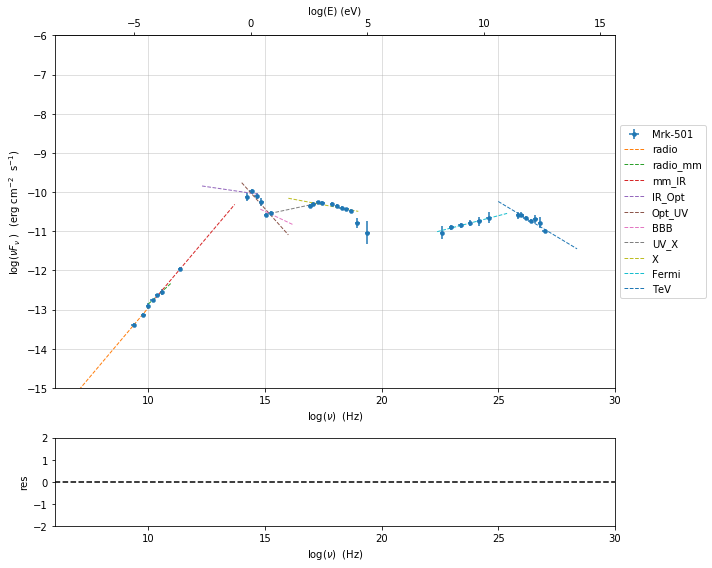

In [5]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(silent=True)
p=my_shape.plot_indices()
p.rescale(y_min=-15,y_max=-6)

### sed shaper

In [6]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=True,
                  Ep_start=None,
                  minimizer='lsb',
                  silent=True,
                  fit_range=[10,21])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
---> class:  HSP

---> class:  HSP
    name       par type       units          val      phys. bound. min phys. bound. max  log  frozen
------------ ------------ ------------- ------------- ---------------- ---------------- ----- ------
           b    curvature               -6.411145e-02    -1.000000e+01     0.000000e+00 False  False
           c third-degree               -1.751708e-03    -1.000000e+01     1.000000e+01 False  False
          Ep    peak freq            Hz  1.703747e+01     0.000000e+00     3.000000e+01  True  False
          Sp    peak flux erg / (cm2 s) -1.030068e+01    -3.000000e+01     0.000000e+00  True  False
nuFnu_p_host  nuFnu-scale erg / (cm2 s) -1.006556e+01    -2.000000e+01     2.000000e+01 False  False
    nu_scale     nu-scale            Hz  1.730750e-02    -2.000000e+00     2.000000e+00 False  False


---> sync       nu_p=+1.703747e+01 (err=+9.4373

In [7]:
best_fit.show_report()


**************************************************************************************************
Fit report

Model: sync-shape-fit
    name       par type       units          val      phys. bound. min phys. bound. max  log  frozen
------------ ------------ ------------- ------------- ---------------- ---------------- ----- ------
           b    curvature               -6.411145e-02    -1.000000e+01     0.000000e+00 False  False
           c third-degree               -1.751708e-03    -1.000000e+01     1.000000e+01 False  False
          Ep    peak freq            Hz  1.703747e+01     0.000000e+00     3.000000e+01  True  False
          Sp    peak flux erg / (cm2 s) -1.030068e+01    -3.000000e+01     0.000000e+00  True  False
nuFnu_p_host  nuFnu-scale erg / (cm2 s) -1.006556e+01    -2.000000e+01     2.000000e+01 False  False
    nu_scale     nu-scale            Hz  1.730750e-02    -2.000000e+00     2.000000e+00 False  False

converged=True
calls=144
The relative error between two c


*** Log-Polynomial fitting of the IC component ***
---> fit range: [23, 29]
---> LogCubic fit

**************************************************************************************************
Fit report

Model: IC-shape-fit
name   par type       units          val      phys. bound. min phys. bound. max  log  frozen
---- ------------ ------------- ------------- ---------------- ---------------- ----- ------
   b    curvature               -1.310958e-01    -1.000000e+01     0.000000e+00 False  False
   c third-degree               -3.300308e-02    -1.000000e+01     1.000000e+01 False  False
  Ep    peak freq            Hz  2.549604e+01     0.000000e+00     3.000000e+01  True  False
  Sp    peak flux erg / (cm2 s) -1.057946e+01    -3.000000e+01     0.000000e+00  True  False

converged=True
calls=217
------------------------------------------------------------------
| FCN = 1.997                   |     Ncalls=216 (216 total)     |
| EDM = 9.56E-07 (Goal: 1E-05)  |            up = 1.0  

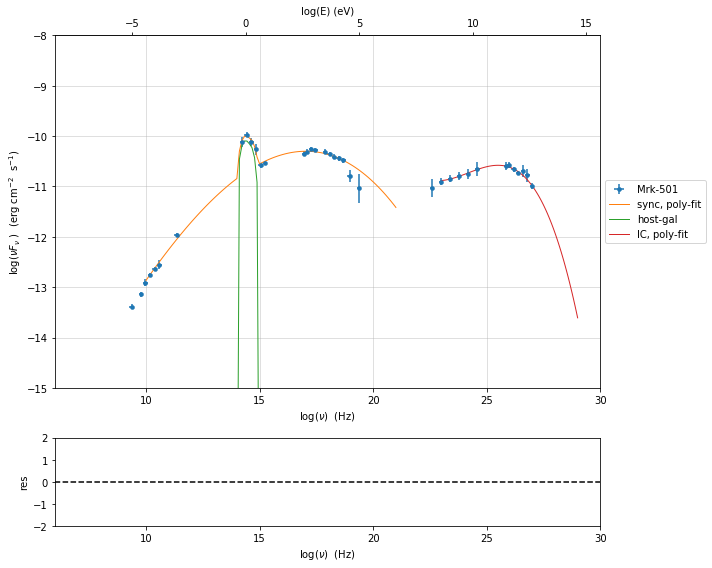

In [8]:
my_shape.IC_fit(fit_range=[23,29],minimizer='minuit')
p=my_shape.plot_shape_fit()
p.rescale(y_min=-15)

### model constraining

In [9]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='lppl',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E11,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False)
prefit_jet.save_model('prefit_jet_gal_templ.pkl')


***  constrains parameters from observable ***

---> ***  emitting region parameters  ***
---> name = beam_obj          type = beaming               units = Lorentz-factor*   val = +2.500000e+01  phys-bounds = [+1.000000e-04,No           ] islog = False  froze= False 
---> setting par type redshift, corresponding to par z_cosm
--->  name = z_cosm            type = redshift              units =                   val = +3.360000e-02  phys-bounds = [+0.000000e+00,No           ] islog = False  froze= False 

---> setting par type magnetic_field, corresponding to par B
--->  name = B                 type = magnetic_field        units = G                 val = +5.050000e-02  phys-bounds = [+0.000000e+00,No           ] islog = False  froze= False 

---> setting par type region_size, corresponding to par R
--->  name = R                 type = region_size           units = cm                val = +1.879504e+17  phys-bounds = [+1.000000e+03,+1.000000e+30] islog = False  froze= False 


---> **

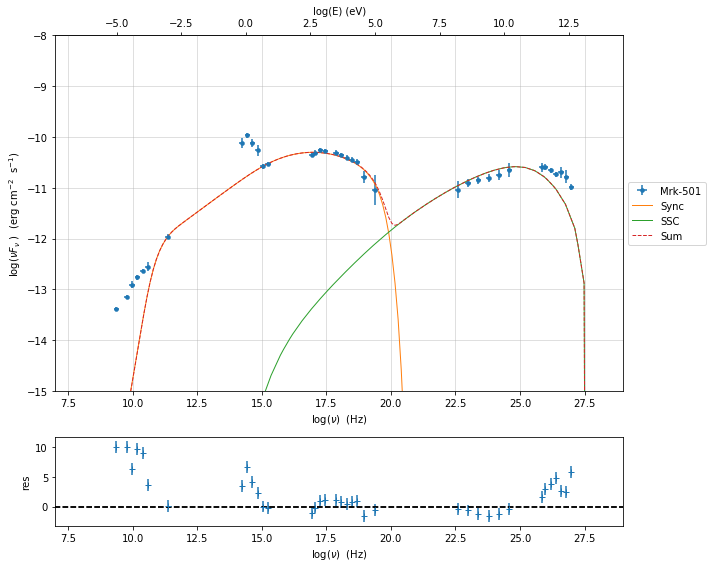

In [10]:
pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_residual_plot(prefit_jet,sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)

## Model fitting

### Model fitting with LSB

In [11]:
from jetset.model_manager import  FitModel
from jetset.jet_model import Jet

jet_lsb=Jet.load_model('prefit_jet_gal_templ.dat')
jet_lsb.set_gamma_grid_size(200)

fit_model_lsb=FitModel( jet=jet_lsb, name='SSC-best-fit-lsb',template=my_shape.host_gal) 
fit_model_lsb.freeze('z_cosm')
fit_model_lsb.freeze('R_H')
fit_model_lsb.parameters.beam_obj.fit_range=[5,50]
fit_model_lsb.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_lsb.parameters.gmax.fit_range=[1E4,1E8]
fit_model_lsb.parameters.nuFnu_p_host.frozen=False
fit_model_lsb.parameters.nu_scale.frozen=True


model_minimizer_lsb,best_fit_lsb=fit_SED(fit_model_lsb,sed_data,10.0**11,10**29.0,fitname='SSC-best-fit-lsb',minimizer='lsb')
best_fit_lsb.save_report('SSC-best-fit-minuit.txt')
model_minimizer_lsb.save_model('model_minimizer_lsb.pkl')
fit_model_lsb.save_model('fit_model_lsb.pkl')

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
               N    electron_density         1 / cm3 1.078494e+02     0.000000e+00               -- False  False
            gmin  low-energy-cut-off lorentz-factor* 1.057074e+02     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.642067e+06     1.000000e+00     1.000000e+15 False  False
               s   LE_spectral_slope                 2.248787e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 3.205571e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 7.432063e+03     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 5.485641e+15     1.000000e+03     1.000000e

In [12]:
best_fit_lsb.save_report()
best_fit_lsb.bestfit_table

name,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
str16,object,object,object,float64,float64,object,bool
N,3.443136e+01,6.452471e+01,--,1.078494e+02,0.000000e+00,--,False
gmin,1.059311e+02,1.451087e+02,--,1.057074e+02,1.000000e+00,1.000000e+09,False
gmax,1.735413e+06,5.844591e+00,--,1.642067e+06,1.000000e+04,1.000000e+08,False
s,2.155232e+00,3.630273e-01,--,2.248787e+00,-1.000000e+01,1.000000e+01,False
r,2.127749e-01,4.741699e-02,--,3.205571e-01,-1.500000e+01,1.500000e+01,False
gamma0_log_parab,3.715049e+03,9.721520e+03,--,7.432063e+03,1.000000e+00,1.000000e+09,False
R,9.624790e+15,8.775038e+15,--,5.485641e+15,3.162278e+15,3.162278e+17,False
R_H,--,--,--,1.000000e+17,0.000000e+00,--,True
B,1.428491e-02,4.975341e-03,--,1.000000e-01,0.000000e+00,--,False


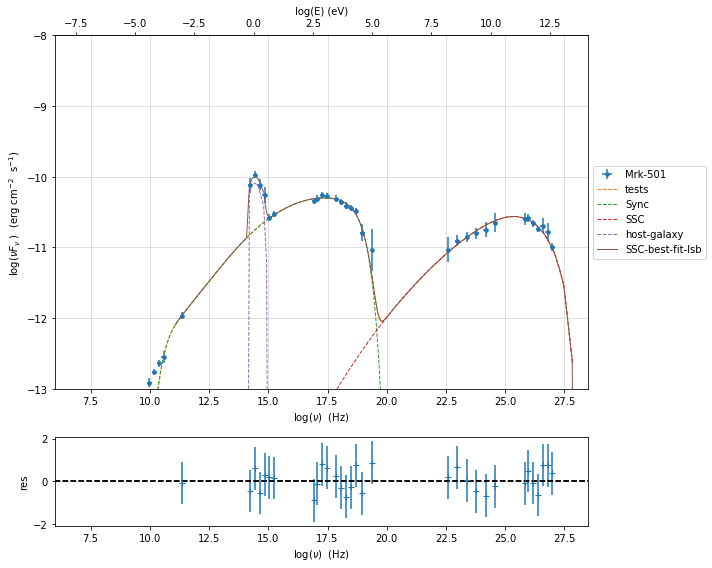

In [13]:
%matplotlib inline
fit_model_lsb.set_nu_grid(1E6,1E30,200)
fit_model_lsb.eval()
p2=fit_model_lsb.plot_model(sed_data=sed_data)
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

### Model fitting with Minuit

In [14]:
jet_minuit=Jet.load_model('prefit_jet_gal_templ.dat')
jet_minuit.set_gamma_grid_size(200)

fit_model_minuit=FitModel( jet=jet_minuit, name='SSC-best-fit-minuit',template=my_shape.host_gal) 
fit_model_minuit.freeze('z_cosm')
fit_model_minuit.freeze('R_H')
fit_model_minuit.parameters.beam_obj.fit_range=[5,50]
fit_model_minuit.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_minuit.parameters.nuFnu_p_host.frozen=False
fit_model_minuit.parameters.nu_scale.frozen=True

model_minimizer_minuit,best_fit_minuit=fit_SED(fit_model_minuit,sed_data,10.0**11,10**29.0,fitname='SSC-best-fit-minuit',minimizer='minuit')
best_fit_minuit.save_report('SSC-best-fit-minuit.txt')
model_minimizer_minuit.save_model('model_minimizer_minuit.pkl')
fit_model_minuit.save_model('fit_model_minuit.pkl')

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
               N    electron_density         1 / cm3 1.078494e+02     0.000000e+00               -- False  False
            gmin  low-energy-cut-off lorentz-factor* 1.057074e+02     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.642067e+06     1.000000e+00     1.000000e+15 False  False
               s   LE_spectral_slope                 2.248787e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 3.205571e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 7.432063e+03     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 5.485641e+15     1.000000e+03     1.000000e

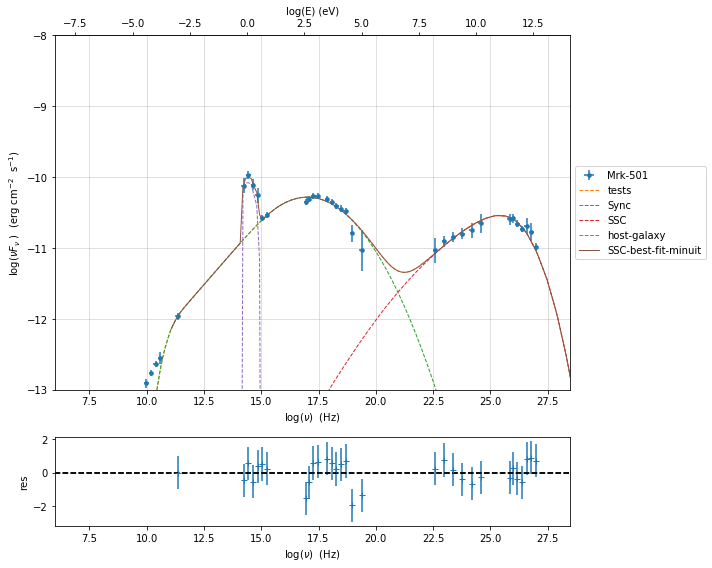

In [15]:
%matplotlib inline
fit_model_minuit.set_nu_grid(1E6,1E30,200)
fit_model_minuit.eval()
p2=fit_model_minuit.plot_model(sed_data=sed_data)
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

In [16]:
model_minimizer_minuit.minimizer.mesg

------------------------------------------------------------------
| FCN = 16.31                   |    Ncalls=1248 (1254 total)    |
| EDM = 0.0111 (Goal: 1E-05)    |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
-------------------------------------------------------------------------------------------
|   | Name  |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-------------------------------------------------------------------------------------------
| 0 | par_0 |    39     |    15     |            |            |    0    |         |       |
| 1 | par_1 |   142.6   |    0.8    |            |            |    1    |  1e+09  |       |
| 2 | par_2 |  0.899E9  |  0.000E9  |            |            |    1    |  1e+15  |       |
| 3 | par_3 |   2.26    |   0.04    |            |            |   -10   |   10    |       |
| 4 | par_4 |   0.37    |   0.04    |            |            |   -15   |   15    |       |
| 5 | par_5 |   1.8E4   |   0.6E4   |            |            |    1    |  1e+09  |       |
| 6 | par_6 |  0.74E16  |  0.17E16  |            |            |3.16228e+15|3.16228e+17|       |
| 7 | par_7 |   0.020   |   0.005   |            |            |    0    |         |       |
| 8 | par_8 |   46.8    |    2.0    |            |            |    5    |   50    |       |
| 9 | par_9 |  -10.04   |    0.05   |            |            |-12.2541 |-8.25412 |       |
-------------------------------------------------------------------------------------------

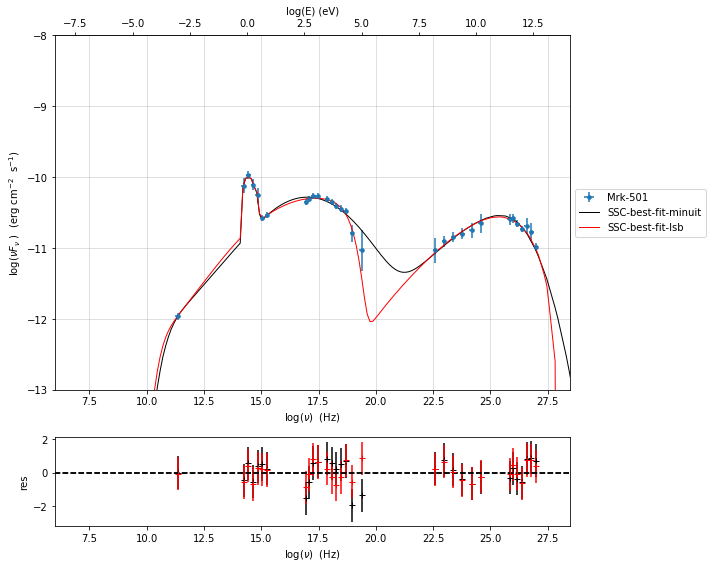

In [17]:
%matplotlib inline
from jetset.plot_sedfit import PlotSED
fit_model_minuit.set_nu_grid(1E6,1E30,200)
fit_model_minuit.eval()
p2=PlotSED()
p2.add_data_plot(sed_data,fit_range=[ 11,29])
p2.add_model_plot(fit_model_minuit,color='black')
p2.add_residual_plot(fit_model_minuit,sed_data,fit_range=[ 11,29],color='black')
p2.add_model_plot(fit_model_lsb,color='red')
p2.add_residual_plot(fit_model_lsb,sed_data,fit_range=[ 11,29],color='red')
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

### Model fitting with a bkn pl


In [18]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='bkn',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E11,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False)
prefit_jet.save_model('prefit_jet_bkn_gal_templ.pkl')


***  constrains parameters from observable ***

---> ***  emitting region parameters  ***
---> name = beam_obj          type = beaming               units = Lorentz-factor*   val = +2.500000e+01  phys-bounds = [+1.000000e-04,No           ] islog = False  froze= False 
---> setting par type redshift, corresponding to par z_cosm
--->  name = z_cosm            type = redshift              units =                   val = +3.360000e-02  phys-bounds = [+0.000000e+00,No           ] islog = False  froze= False 

---> setting par type magnetic_field, corresponding to par B
--->  name = B                 type = magnetic_field        units = G                 val = +5.050000e-02  phys-bounds = [+0.000000e+00,No           ] islog = False  froze= False 

---> setting par type region_size, corresponding to par R
--->  name = R                 type = region_size           units = cm                val = +1.879504e+17  phys-bounds = [+1.000000e+03,+1.000000e+30] islog = False  froze= False 


---> **

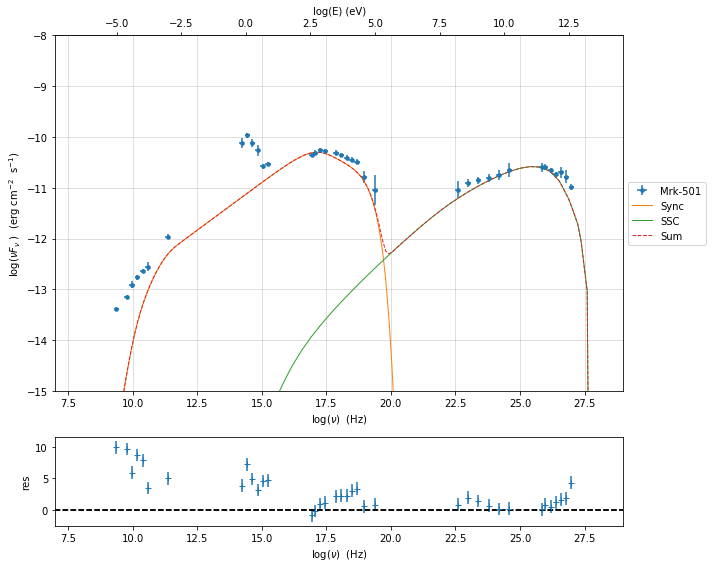

In [19]:
pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_residual_plot(prefit_jet,sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)

In [20]:
jet_minuit_bkn=Jet.load_model('prefit_jet_bkn_gal_templ.pkl')
jet_minuit_bkn.set_gamma_grid_size(200)

fit_model_minuit_bkn=FitModel( jet=jet_minuit_bkn, name='SSC-best-fit-bkn-minuit',template=my_shape.host_gal) 
fit_model_minuit_bkn.freeze('z_cosm')
fit_model_minuit_bkn.freeze('R_H')
fit_model_minuit_bkn.parameters.beam_obj.fit_range=[5,50]
fit_model_minuit_bkn.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_minuit_bkn.parameters.nuFnu_p_host.frozen=False
fit_model_minuit_bkn.parameters.nu_scale.frozen=True

model_minimizer_minuit_bkn,best_fit_minuit_bkn=fit_SED(fit_model_minuit_bkn,sed_data,10.0**11,10**29.0,fitname='SSC-best-fit-minuit',minimizer='minuit')

    name          par type           units          val      phys. bound. min phys. bound. max  log  frozen
----------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
          N    electron_density         1 / cm3 2.193451e+01     0.000000e+00               -- False  False
       gmin  low-energy-cut-off lorentz-factor* 1.888625e+02     1.000000e+00     1.000000e+09 False  False
       gmax high-energy-cut-off lorentz-factor* 1.955869e+06     1.000000e+00     1.000000e+15 False  False
          p   LE_spectral_slope                 2.248787e+00    -1.000000e+01     1.000000e+01 False  False
        p_1   HE_spectral_slope                 3.500000e+00    -1.000000e+01     1.000000e+01 False  False
gamma_break    turn-over-energy lorentz-factor* 1.971879e+05     1.000000e+00     1.000000e+09 False  False
          R         region_size              cm 1.045240e+16     1.000000e+03     1.000000e+30 False  False
        R_H     region_posit

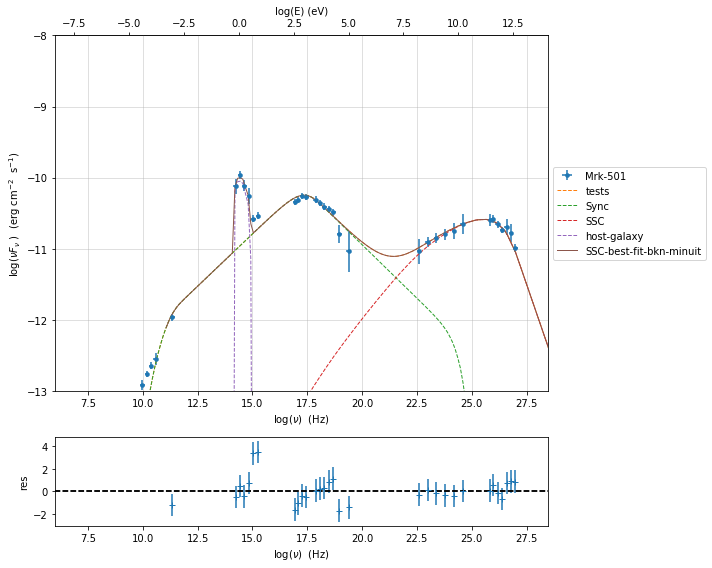

In [21]:
%matplotlib inline
fit_model_minuit_bkn.set_nu_grid(1E6,1E30,200)
fit_model_minuit_bkn.eval()
p2=fit_model_minuit_bkn.plot_model(sed_data=sed_data)
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

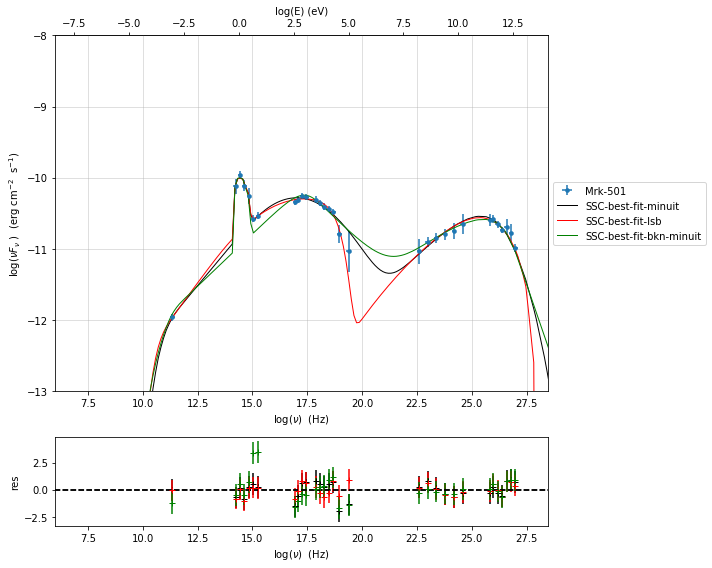

In [22]:
%matplotlib inline
from jetset.plot_sedfit import PlotSED
fit_model_minuit_bkn.set_nu_grid(1E6,1E30,200)
fit_model_minuit_bkn.eval()
p2=PlotSED()
p2.add_data_plot(sed_data,fit_range=[ 11,29])
p2.add_model_plot(fit_model_minuit,color='black')
p2.add_residual_plot(fit_model_minuit,sed_data,fit_range=[ 11,29],color='black')
p2.add_model_plot(fit_model_lsb,color='red')
p2.add_residual_plot(fit_model_lsb,sed_data,fit_range=[ 11,29],color='red')
p2.add_model_plot(fit_model_minuit_bkn,color='green')
p2.add_residual_plot(fit_model_minuit_bkn,sed_data,fit_range=[ 11,29],color='green')
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

In [23]:
from jetset.mcmc import McmcSampler
from jetset.minimizer import ModelMinimizer


In [24]:
model_minimizer_minuit = ModelMinimizer.load_model('model_minimizer_minuit.pkl')


mcmc=McmcSampler(model_minimizer_minuit)
mcmc.run_sampler(nwalkers=128,burnin=10,steps=100,bound=1.5,threads=None,walker_start_bound=0.001)

mcmc run starting


100%|██████████| 100/100 [04:19<00:00,  2.59s/it]

mcmc run done, with 1 threads took 260.91 seconds


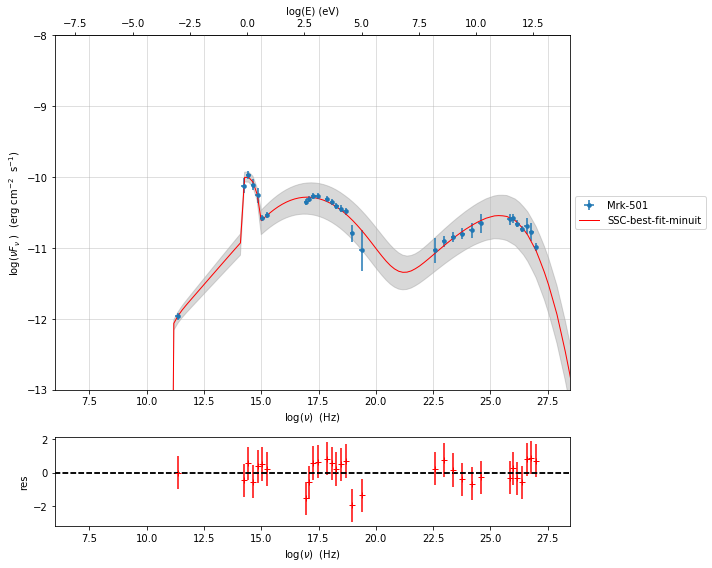

In [25]:
p=mcmc.plot_model(sed_data=sed_data,fit_range=[ 11,27.4],size=50)
p.rescale(y_min=-13,x_min=6,x_max=28.5)

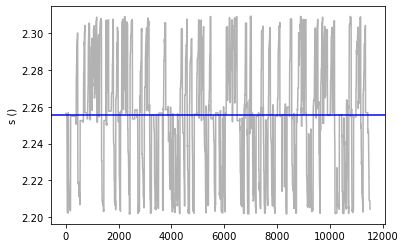

In [26]:
f=mcmc.plot_chain('s',log_plot=False)

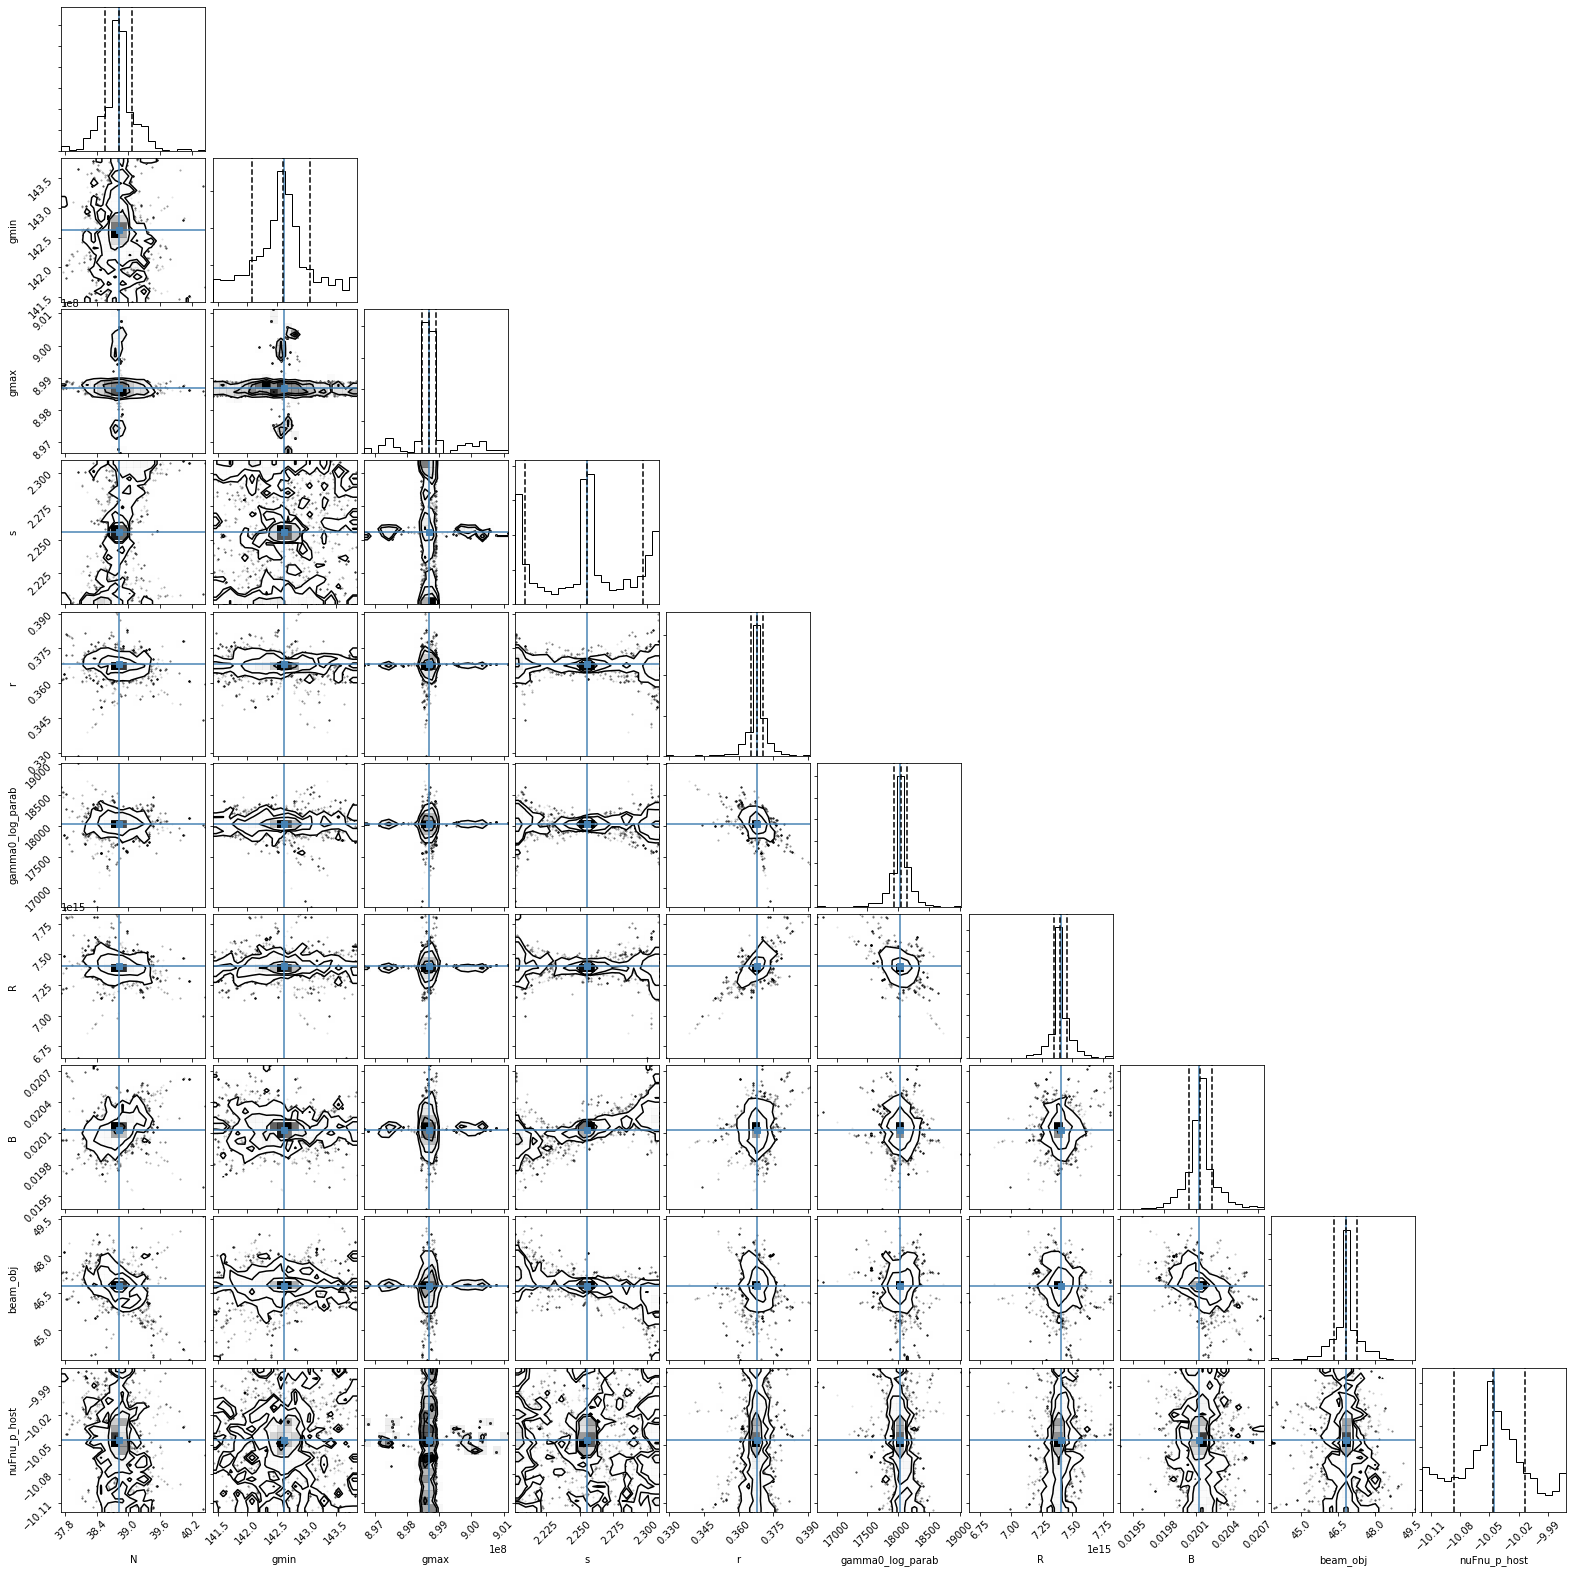

In [27]:
f=mcmc.corner_plot()

In [28]:
mcmc.get_par('N')

(array([38.81078755, 38.81078755, 38.81078755, ..., 38.66413395,
        38.66413395, 38.66413395]),
 0)

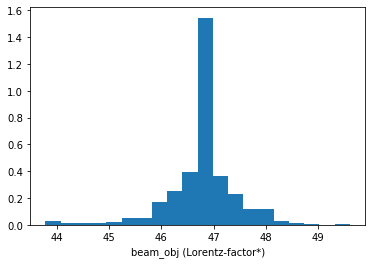

In [29]:
f=mcmc.plot_par('beam_obj')

In [30]:
mcmc.save('mcmc_sampler.pkl')

In [31]:
ms=McmcSampler.load('mcmc_sampler.pkl')

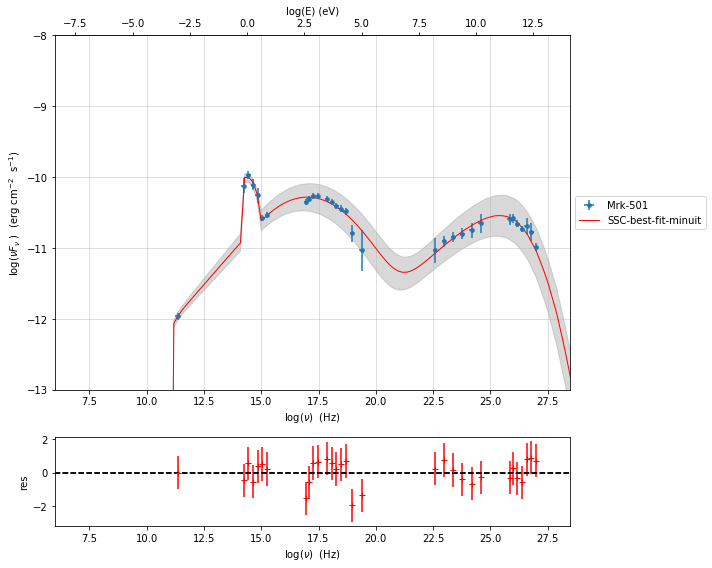

In [32]:
p=ms.plot_model(sed_data=sed_data,fit_range=[ 11,27.4],size=50)
p.rescale(y_min=-13,x_min=6,x_max=28.5)

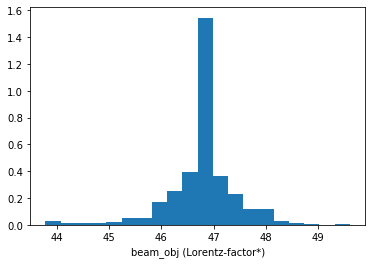

In [33]:
f=ms.plot_par('beam_obj',log_plot=False)


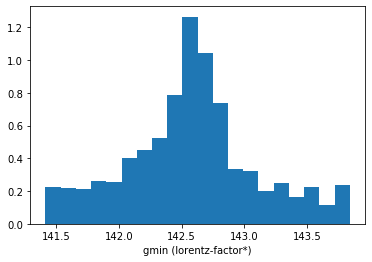

In [34]:
f=ms.plot_par('gmin',log_plot=False)


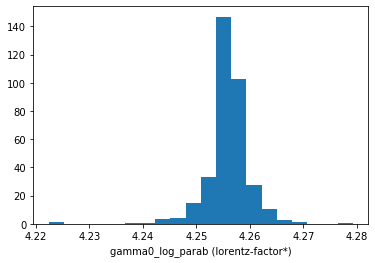

In [35]:
f=ms.plot_par('gamma0_log_parab',log_plot=True)


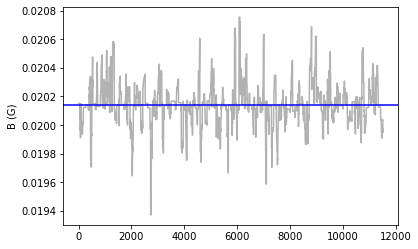

In [36]:
f=ms.plot_chain('B',log_plot=False)